In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib notebook
sns.set()

<IPython.core.display.Javascript object>


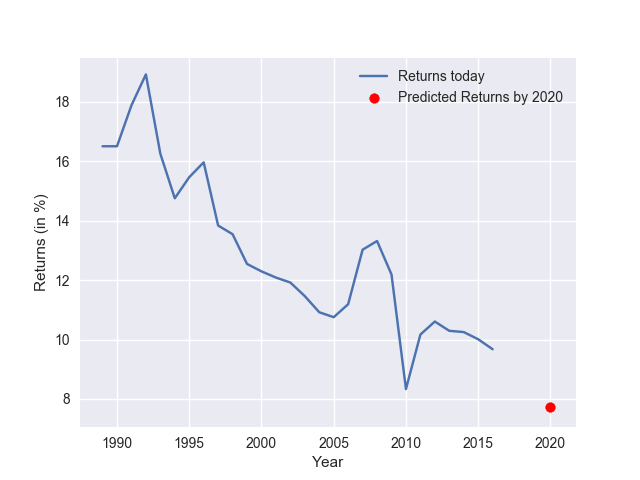

In [14]:
df = pd.read_csv('datasets/bank/API_FR.INR.LEND_DS2_en_csv_v2.csv')
df = df[df['Country Name'] == 'India']
df = df[df.columns[-30:-2]]
df
df2 = pd.DataFrame()
df2['Year'] = df.columns
df2['Price'] = df.values.reshape(-1)
fig = plt.figure(1)
axes = fig.add_subplot(111)
axes.plot(df2['Year'], df2['Price'], label='Returns today')
plt.show()
linreg = LinearRegression().fit(df2[df2.columns[0:1]], df2['Price'])
listt = []
years = []
for x in range(2020,2021):
    years.append(x)
    listt.append(linreg.predict(x))
listt

plt.xlabel("Year")
plt.ylabel("Returns (in %)")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(years, listt, c='r', label='Predicted Returns by 2020')
plt.legend()